# Simple Lumped Parameter Thermal Model

This can be used to generate estimated thermal trends for "well behaved" locations. 

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

from Ska.engarchive import fetch_eng as fetch
from Chandra.Time import DateTime

# This is only required for use in a notebook
%matplotlib inline

## Define thermal model function

In [9]:
def func(t, T0, Ts, k):
    return Ts + (T0 - Ts) * np.exp(-k * t)

## Define initial dataset

In this case we are just fetching telemetry, but you can substitute your own thermal data. The independent variable (time dimension) should be relative to zero to aid convergence.

In [11]:
data_all = fetch.Msid('tssmax', '2015:006:17:30:00', '2015:009:12:00:00', stat=None)
data = fetch.Msid('tssmax', '2015:006:17:30:00', '2015:007:00:00:00', stat=None)

datavals = data.vals
datatimes = data.times - data.times[0]

## Optimize the inputs to the thermal model function to minimize error

  - `popt`: optimized inputs for func()
  - `pcov`: covariance  
  - `p0`: initial guess for T0, Ts, k

In [ ]:
popt, pcov = curve_fit(func, datatimes, datavals, p0=[80, 90, .0003])

## Calculate model temperatures based on a new set of times

In [ ]:
t = np.arange(0, 2*24*3600, 320)
predicted_data = func(t, *popt)

## Plot Results

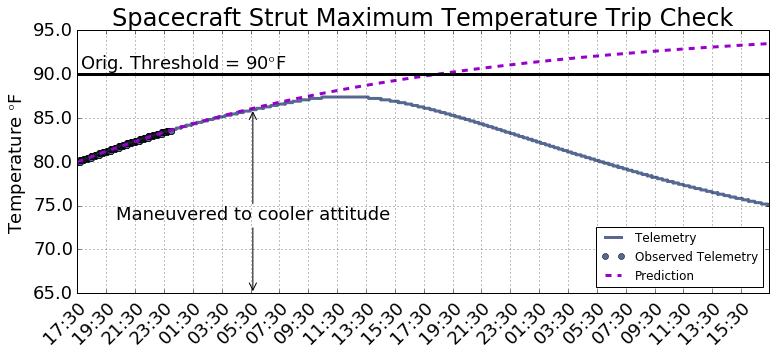

In [6]:
# Create Plot
xlabs = [DateTime(n + data.times[0]).date for n in np.arange(t[0], t[-1], 2 * 3600.)]
xticks = DateTime(xlabs).secs
xlabs = [DateTime(x).date[9:14] for x in xlabs]
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0.1, 0.17, 0.8, 0.73])
ax.patch.set_visible(False)
ax.plot(data_all.times, data_all.vals, color='#576993', linewidth=3, label='Telemetry')
ax.plot(data.times, data.vals, 'o', color='#576993', label='Observed Telemetry')
ax.plot(t + data.times[0], predicted_data, '--', color='#9900cc', linewidth=3, 
        label='Prediction')
ax.plot([t[0] + data.times[0], t[-1] + data.times[0]], [90., 90.], '#000000', linewidth=3)
ax.grid(visible=True)
ax.set_ylabel('Temperature $\degree$F ',fontsize=18)
ax.set_xticklabels('')
ax.set_xticks(xticks)
_ = ax.set_xticklabels(xlabs, fontsize=18, rotation=45, rotation_mode='anchor', ha='right')
ax.set_xlim(t[0] + data.times[0], t[-1] + data.times[0])
_ = ax.set_yticklabels(ax.get_yticks(), fontsize=18)
_ = ax.set_title('Spacecraft Strut Maximum Temperature Trip Check', fontsize=24)
ax.legend(loc='lower right')
_ = ax.text(xticks[0]+600, 90., 'Orig. Threshold = 90$\degree$F', ha="left",
            va="bottom", size=18)
_ = ax.annotate('Maneuvered to cooler attitude',
                xy=(DateTime('2015:007:05:39:59.616').secs, 65),  xycoords='data',
                xytext=(DateTime('2015:007:05:39:59.616').secs,74),
                textcoords='data',arrowprops=dict(arrowstyle="->"),
                horizontalalignment='center', verticalalignment='center', fontsize=18)
_ = ax.annotate('', xy=(DateTime('2015:007:05:39:59.616').secs, 86),  xycoords='data',
                xytext=(DateTime('2015:007:05:39:59.616').secs,75),
                textcoords='data',arrowprops=dict(arrowstyle="->"), fontsize=18)